<a href="https://colab.research.google.com/github/scdesiraju/Covid-19/blob/master/Covid_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Data**

In [46]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from  sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
sym=pd.read_csv("symptoms.csv")
covid = pd.read_csv("Covid-19 dataset.csv")
covid1=pd.read_csv('covid_19_clean_complete[1].csv',parse_dates=['Date'])

## **`Categorical Prediction`**

In [31]:
#Seperating the Features (x) and the Labels (y)
x=sym[['Fever','Tiredness','Dry-Cough','Difficulty-in-Breathing','Sore-Throat','Pains','Nasal-Congestion','Runny-Nose','Diarrhea']]
y=sym[['Covid']]
y=np.ravel(y)

**K-means clustering** 

In [32]:
#Import the algorithm
kmodel=KNeighborsClassifier(n_neighbors=4)

#Train and fit the model
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.4,random_state=0)
kmodel.fit(xtrain,ytrain)

#Evaluate the model
yp_train=kmodel.predict(xtrain)
print("The trained accuracy is:") 
print((yp_train==ytrain).sum() / len(xtrain))

yp_test=kmodel.predict(xtest)
print("The tested accuracy is:")
print((yp_test==ytest).sum() / len(xtest))

The trained accuracy is:
0.9611470860314524
The tested accuracy is:
0.9626038781163435


In [33]:
#To check where minimum error and maximum accuracy occurs 
train=[]
test=[]

#Varying the number of neighbors to check for most accuracy in both training and testing
for i in range(1,15):
  xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.4,random_state=0)
  
  kmodel=KNeighborsClassifier(n_neighbors=i)

  kmodel.fit(xtrain,ytrain)

  yp_train=kmodel.predict(xtrain)
  train.append((yp_train==ytrain).sum() / len(xtrain))

  yp_test=kmodel.predict(xtest)
  test.append((yp_test==ytest).sum() / len(xtest))

print(test)
print(train)

[0.9542936288088643, 0.9653739612188366, 0.96398891966759, 0.9626038781163435, 0.9542936288088643, 0.9556786703601108, 0.9515235457063712, 0.9529085872576177, 0.9349030470914127, 0.9349030470914127, 0.945983379501385, 0.945983379501385, 0.9473684210526315, 0.9362880886426593]
[0.9592969472710453, 0.9592969472710453, 0.9565217391304348, 0.9611470860314524, 0.9629972247918593, 0.96577243293247, 0.9611470860314524, 0.9602220166512488, 0.9648473635522664, 0.9648473635522664, 0.9685476410730804, 0.9685476410730804, 0.9685476410730804, 0.9648473635522664]


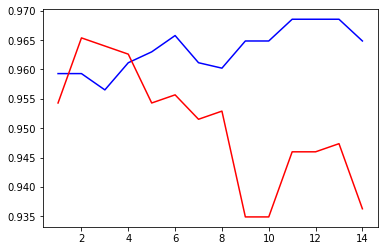

In [34]:
#Plotting to compare errors of testing and training
plt.plot(range(1,15),train,c='blue')
plt.plot(range(1,15),test,c='red')

**Decision Tree**

In [35]:
#Import the algorithm
dmodel=DecisionTreeClassifier(max_depth=7)

#Train and fit the model
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.4,random_state=0)
dmodel.fit(xtrain,ytrain)

#Evaluate the model
print("The training accuracy is:")
print(dmodel.score(xtrain,ytrain))

print("The testing accuracy is:")
print(dmodel.score(xtest,ytest))

The training accuracy is:
0.9666975023126735
The testing accuracy is:
0.9542936288088643


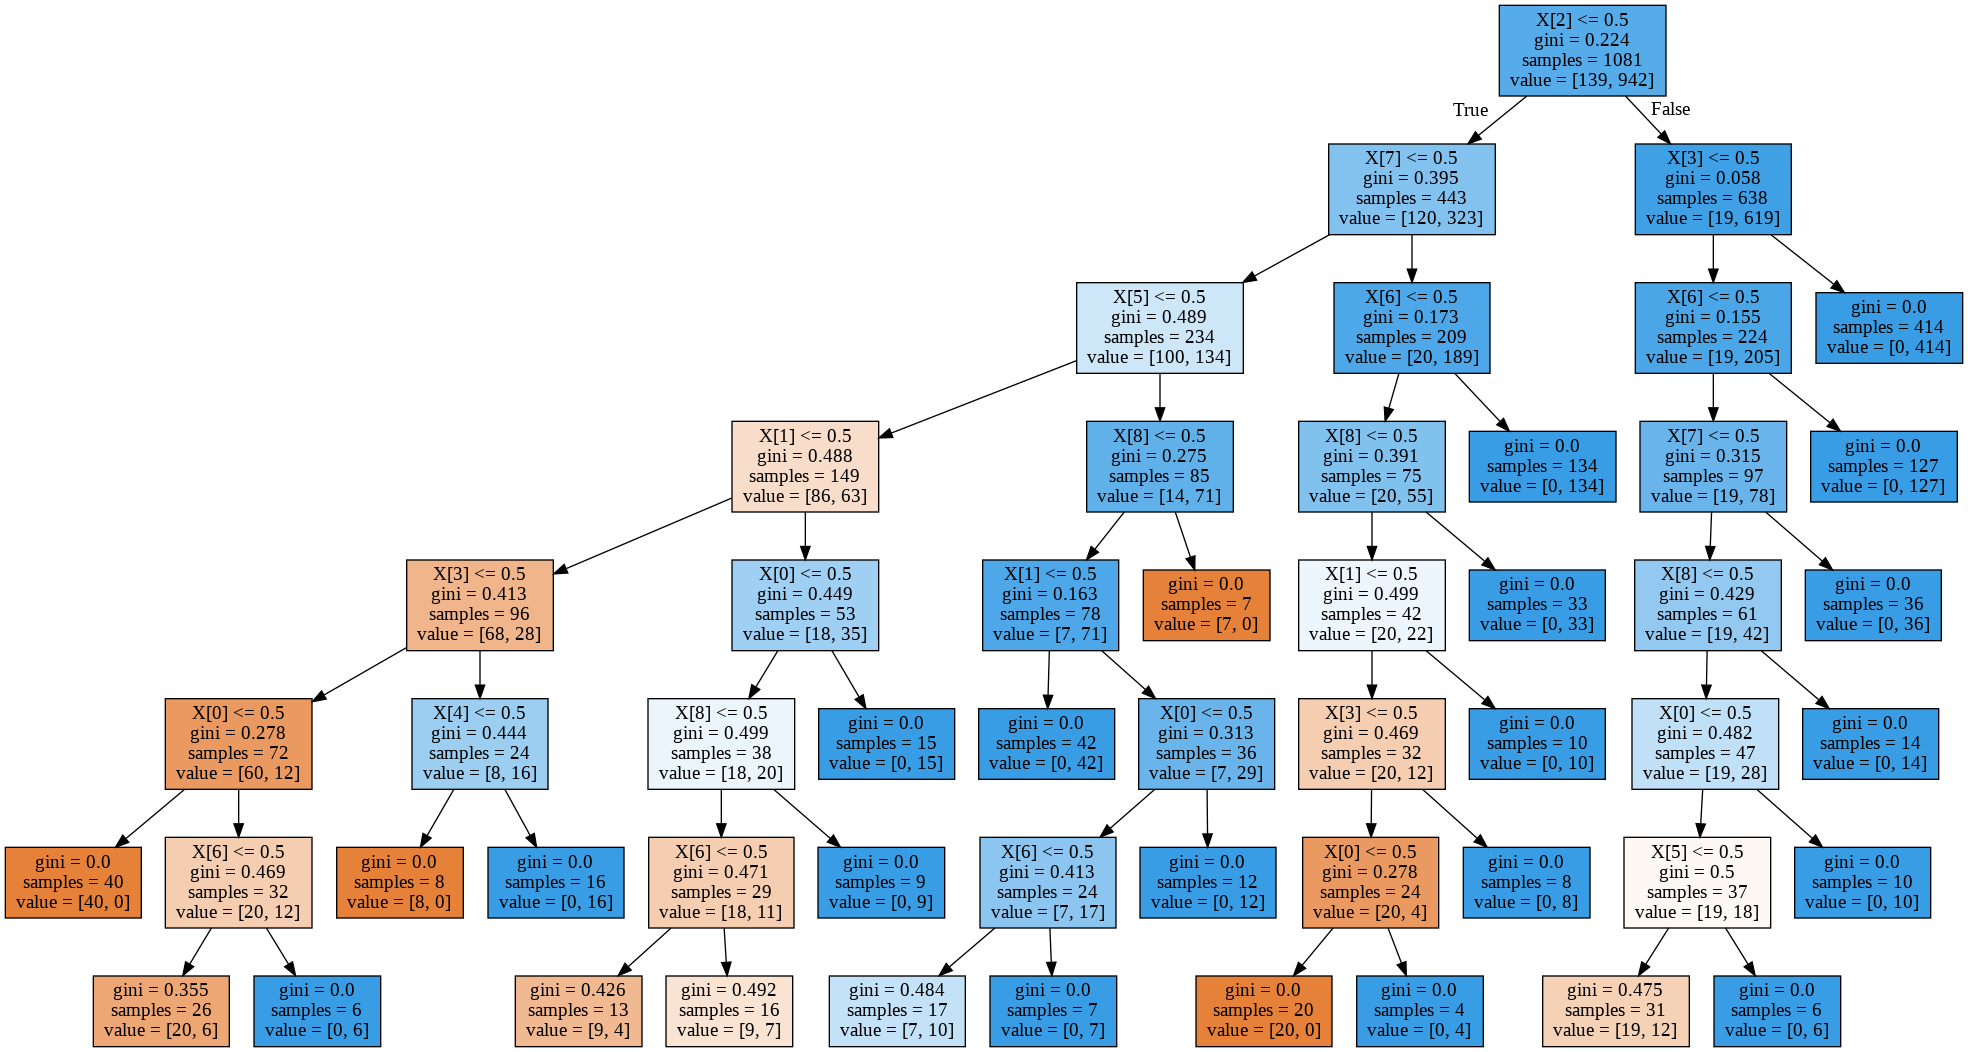

In [36]:
#Viewing the tree
dot_data=export_graphviz(dmodel,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Neutral Networks**

In [37]:
#Import the Algorithm
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 2), random_state=1)

#Train and fit the model
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.4,random_state=0)
clf.fit(xtrain,ytrain)

#Evaluate the model
yp_train=clf.predict(xtrain)
yp_test=clf.predict(xtest)

print("The training accuracy is:")
print((yp_train==ytrain).sum() / len(xtrain))

print("The testing accuracy is:")
print((yp_test==ytest).sum() / len(xtest))

The training accuracy is:
0.9666975023126735
The testing accuracy is:
0.9556786703601108


In [38]:
#To check where minimum error and maximum accuracy occurs
train=[]
test=[]

#Varying the number of hidden layer to check for maximum accuracy in both training and testing
for i in range(1,10):
  clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i, 2), random_state=1)
  
  xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.4,random_state=0)
  clf.fit(xtrain,ytrain)
  
  yp_train=clf.predict(xtrain)
  yp_test=clf.predict(xtest)
  
  print(i)
  print((yp_train==ytrain).sum() / len(xtrain))
  print((yp_test==ytest).sum() / len(xtest))

1
0.8714153561517114
0.8601108033240997
2
0.8714153561517114
0.8601108033240997
3
0.9685476410730804
0.9473684210526315
4
0.9666975023126735
0.9556786703601108
5
0.8880666049953746
0.8795013850415513
6
0.9685476410730804
0.9473684210526315
7
0.9666975023126735
0.9445983379501385
8
0.9666975023126735
0.9556786703601108
9
0.9685476410730804
0.945983379501385


#**Covid Graphs**

In [39]:
#Creating dataset with only required columns
covid = covid[covid.columns[0:5]]

#Sorting dataset in decending order with respect to the total number of confirmed cases
covid = covid.sort_values('Confirmed', ascending=False)
covid

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,3363056,135605,1031939,2195512
23,Brazil,1884967,72833,1291251,520883
79,India,906752,23727,571460,311565
138,Russia,732547,11422,503168,217957
132,Peru,330123,12054,221008,97061
...,...,...,...,...,...
140,Saint Kitts and Nevis,17,0,15,2
68,Greenland,13,0,13,0
75,Holy See,12,0,12,0
130,Papua New Guinea,11,0,8,3


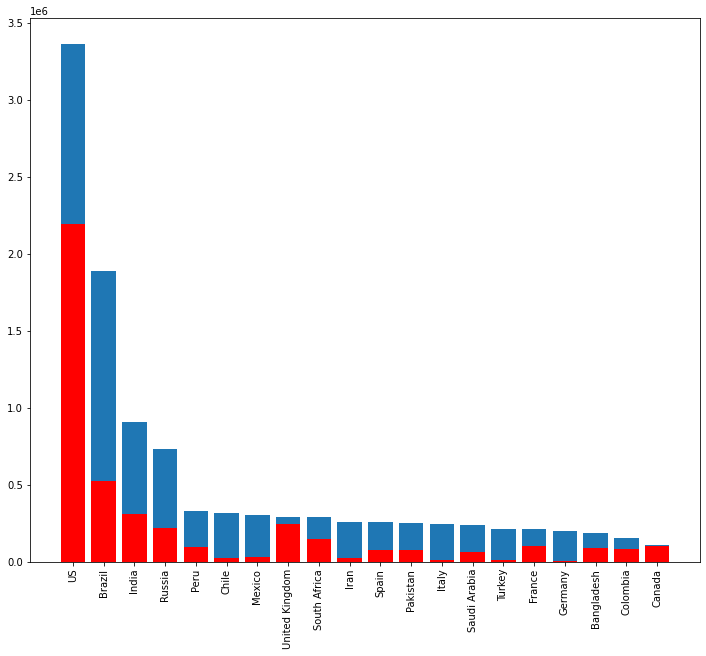

In [40]:
#Plotting and comparing the the Confirmed and Active cases of the first 20 countries leading in total confirmed cases
top_20 = covid.head(20)
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
plt.bar(top_20['Country/Region'],top_20['Confirmed'])
plt.bar(top_20['Country/Region'],top_20['Active'],color='r')
plt.show()

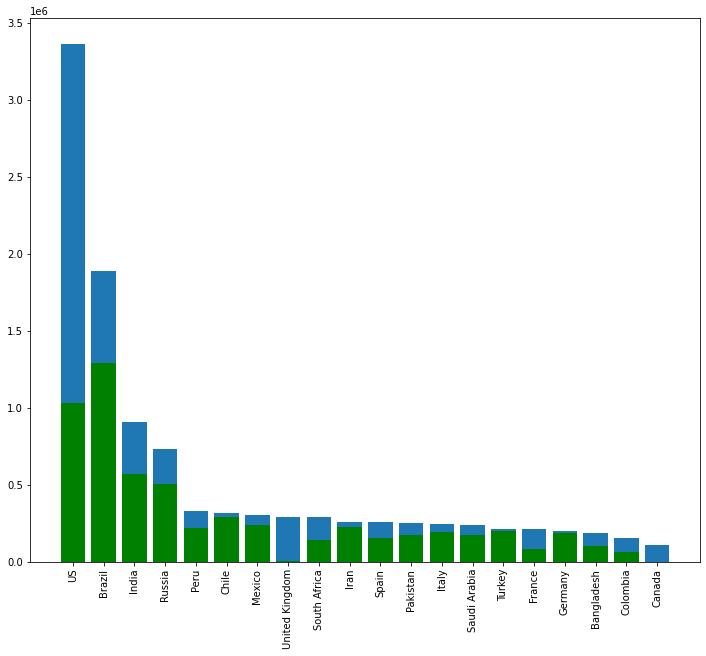

In [41]:
#Plotting and comparing the Compared and Recovered cases of the first 20 countries leading in total cases
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
plt.bar(top_20['Country/Region'],top_20['Confirmed'])
plt.bar(top_20['Country/Region'],top_20['Recovered'],color='g')
plt.show()

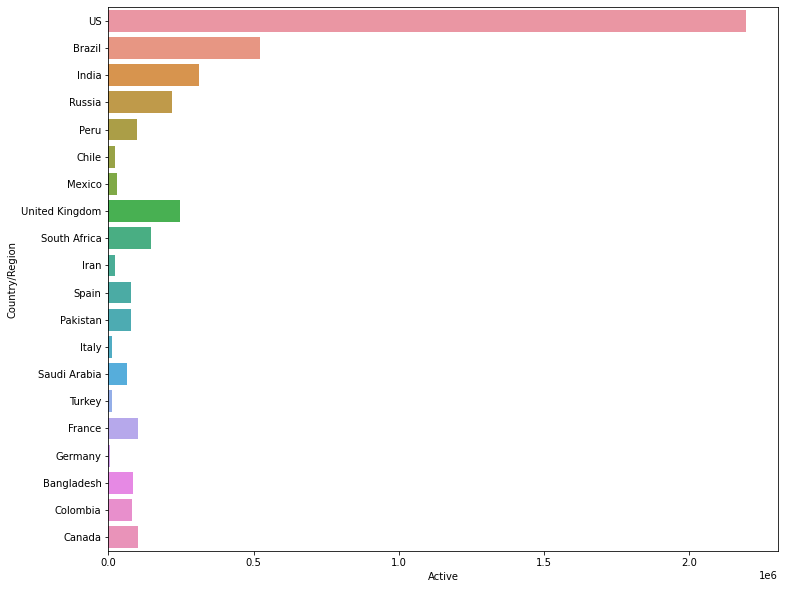

In [42]:
#Plotting and comparing the the Confirmed cases of the first 20 countries leading in total confirmed cases in the form of a barplot.
plt.figure(figsize=(12,10))
sns.barplot(top_20['Active'],top_20['Country/Region'])
plt.show()

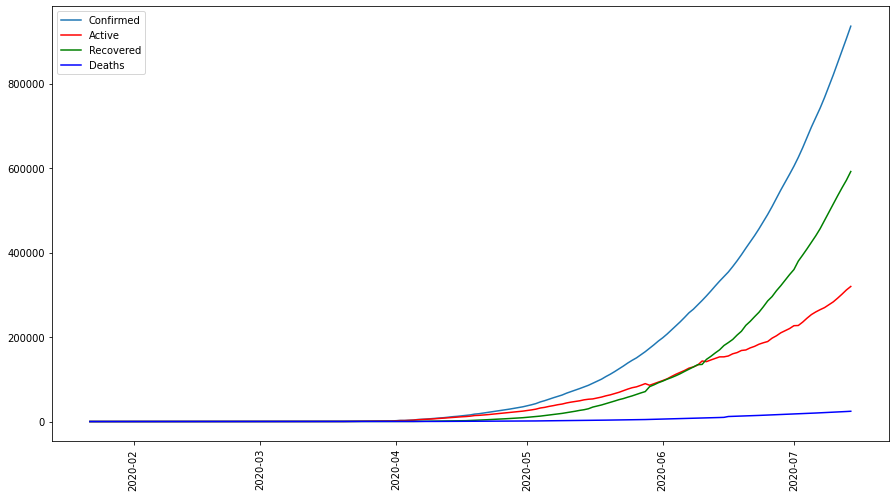

In [43]:
#Plotting and comparing the Confirmed cases, Active cases, Recovered cases and Deaths of India by plotting
covid1['Active'] = covid1['Confirmed'] - covid1['Deaths'] - covid1['Recovered']
India = covid1[covid1['Country/Region'] == 'India']

#Grouping Indias cases Date wise
India = India.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

#Plotting
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.plot(India['Date'],India['Confirmed'],label='Confirmed')
plt.plot(India['Date'],India['Active'],c='r',label='Active')
plt.plot(India['Date'],India['Recovered'],c='g',label='Recovered')
plt.plot(India['Date'],India['Deaths'],c='b',label='Deaths')
plt.legend()
plt.show()

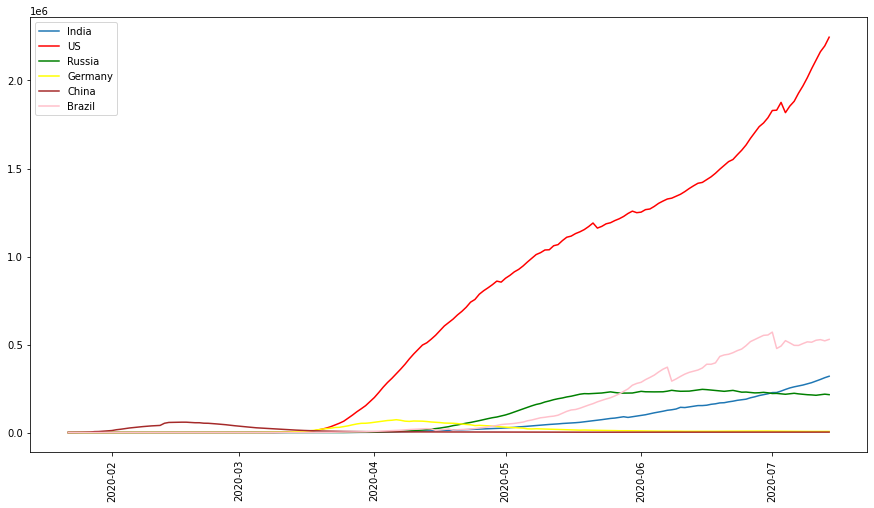

In [44]:
#Grouping USAs cases Date wise
US = covid1[covid1['Country/Region'] == 'US']
US = US.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

#Grouping Russias cases Date wise
Russia = covid1[covid1['Country/Region'] == 'Russia']
Russia = Russia.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

#Grouping Germanys cases Date wise
Germany = covid1[covid1['Country/Region'] == 'Germany']
Germany = Germany.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

#Grouping Chinas cases Date wise
China = covid1[covid1['Country/Region'] == 'China']
China = China.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

#Grouping Brazils cases Date wise
Brazil = covid1[covid1['Country/Region'] == 'Brazil']
Brazil = Brazil.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

#Plotting
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.plot(India['Date'],India['Active'],label='India')
plt.plot(US['Date'],US['Active'],c='r',label='US')
plt.plot(Russia['Date'],Russia['Active'],c='g',label='Russia')
plt.plot(Germany['Date'],Germany['Active'],c='yellow',label='Germany')
plt.plot(China['Date'],China['Active'],c='brown',label='China')
plt.plot(Brazil['Date'],Brazil['Active'],c='pink',label='Brazil')
plt.legend()
plt.show()

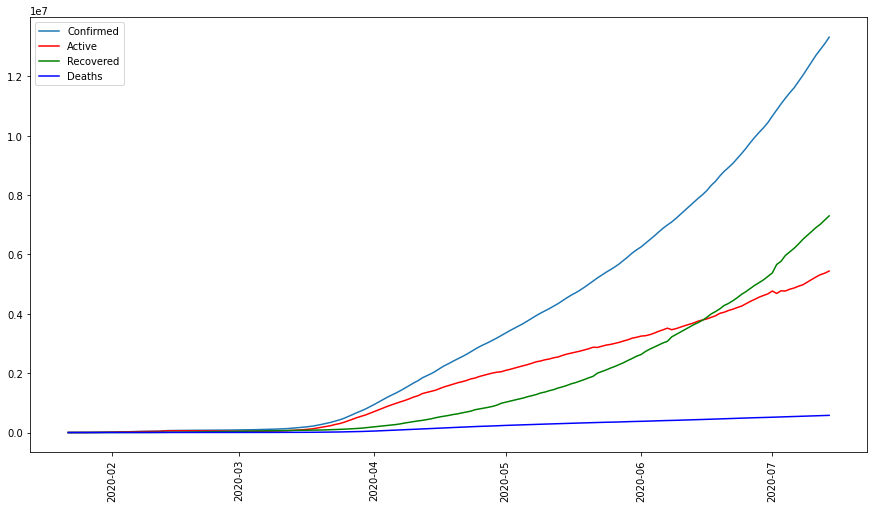

In [45]:
#Comparing the Confirmed cases, Active cases, Recovered cases and Deaths worldwide.
world = covid1.groupby(['Date'])['Confirmed','Active','Recovered','Deaths'].sum().reset_index()

#plotting
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.plot(world['Date'],world['Confirmed'],label='Confirmed')
plt.plot(world['Date'],world['Active'],c='r',label='Active')
plt.plot(world['Date'],world['Recovered'],c='g',label='Recovered')
plt.plot(world['Date'],world['Deaths'],c='b',label='Deaths')
plt.legend()
plt.show()